# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


### Download raw data from [here](https://drive.google.com/file/d/1_p_RhRIL-5yPVU0-f5-hoNoyZt91d5VD/view?usp=sharing)

# Read Data

In [2]:
data = pd.read_csv('Input/BloombergData.csv') #Original raw data file

KSE100 = pd.read_csv('Input/KSE100.csv') #Shortlisted companies

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,

In [3]:
data.head()

,Start Date,1/1/2001,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 3988,Unnamed: 3989,Unnamed: 3990,Unnamed: 3991,Unnamed: 3992,Unnamed: 3993,Unnamed: 3994,Unnamed: 3995,Unnamed: 3996,Unnamed: 3997
0,End Date,10/9/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,786 PA Equity,NaN,NaN,NaN,NaN,NaN,NaN,AABS PA Equity,NaN,...,NaN,NaN,NaN,ZTL PA Equity,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,...,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?
4,Dates,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_MID,PX_VOLUME,VWAP_VOLUME,PX_OPEN,PX_HIGH,...,PX_MID,PX_VOLUME,VWAP_VOLUME,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_MID,PX_VOLUME,VWAP_VOLUME


In [4]:
date = data.iloc[5:len(data)-1, 0] #Extract date column

filtered = KSE100['Ticker'].tolist() #Filtered companies stored in a list

for i in range(1, len(data.columns)-1, 7): #loop runs over every 7 columns which represents each company
    
    name = data.iat[2,i] #Extract name of compay loaded into the loop
    
    if name not in filtered: #Extracts only shortlisted companies
        continue
    
    df = data.iloc[5:len(data)-1, i:i+7] #Extract all rows under those 7 columns
    df.columns = ['Open', 'High', 'Low', 'Close', 'Mid', 'Volume', 'VWAP-Volume'] #Renaming columns
    df = df.drop(['Mid', 'VWAP-Volume'], axis = 1) #Drop unneccessary columns
    df['Date'] = date #Add date
    df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']] #Ordering Columns
    df = df.iloc[1:] #Delete first row
    df = df.dropna() #Delete missing values
    df['Open'] = pd.to_numeric(df['Open']) #Change datatype of Open (Initially object type)
    df['High'] = pd.to_numeric(df['High']) #Change datatype of High (Initially object type)
    df['Low'] = pd.to_numeric(df['Low']) #Change datatype of Low (Initially object type)
    df['Close'] = pd.to_numeric(df['Close']) #Change datatype of Close (Initially object type)
    df['Volume'] = pd.to_numeric(df['Volume']) #Change datatype of Volume (Initially object type)
    df['Date'] = pd.to_datetime(df['Date']) #Change data type to datetime (Iitially object type)
    df.to_csv(path_or_buf = 'Input/' + name + '.csv', index = False) #Save dataframe as CSV
    df = df.drop(['Date'], axis = 1)
    df = df.diff()
    df = df.iloc[1:]
    df.to_csv(path_or_buf = 'Input/' + name + '.csv', index = False) #Save dataframe as CSV
    
    
#Results in 100 distinct csv files unique to each shortlisted company
    
    

In [5]:
abl = pd.read_csv('Input/ABL PA Equity.csv')

In [6]:
abl.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3952 entries, 0 to 3951
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3952 non-null   object 
 1   Open    3952 non-null   float64
 2   High    3952 non-null   float64
 3   Low     3952 non-null   float64
 4   Close   3952 non-null   float64
 5   Volume  3952 non-null   float64
dtypes: float64(5), object(1)
memory usage: 185.4+ KB


# Data Visualisation

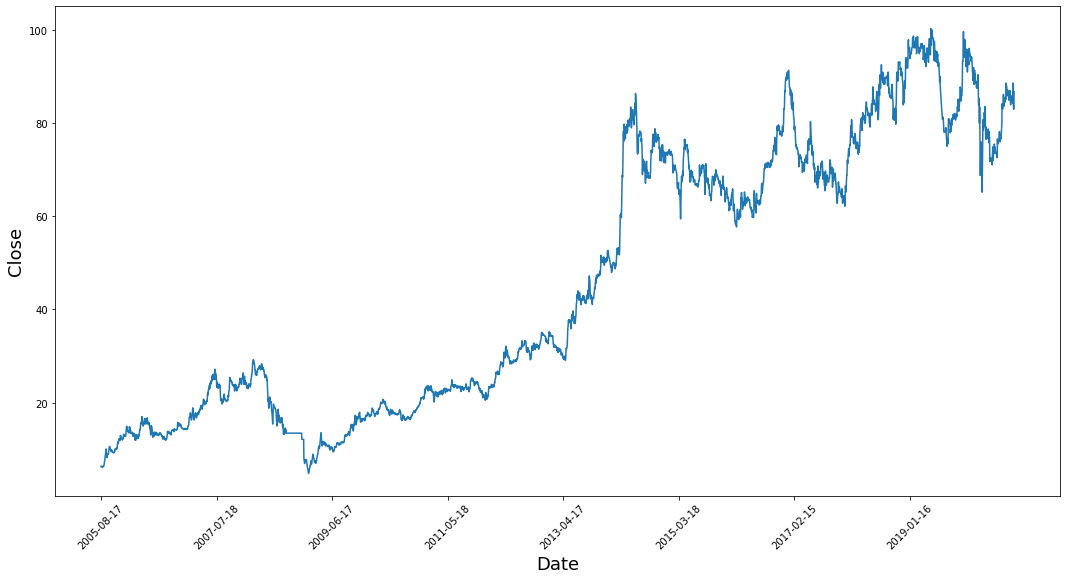

In [7]:
plt.figure(figsize = (18,9))
plt.plot(range(abl.shape[0]), abl['Close'])
plt.xticks(range(0, abl.shape[0], 500), abl['Date'].loc[::500], rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close', fontsize=18)
plt.show()

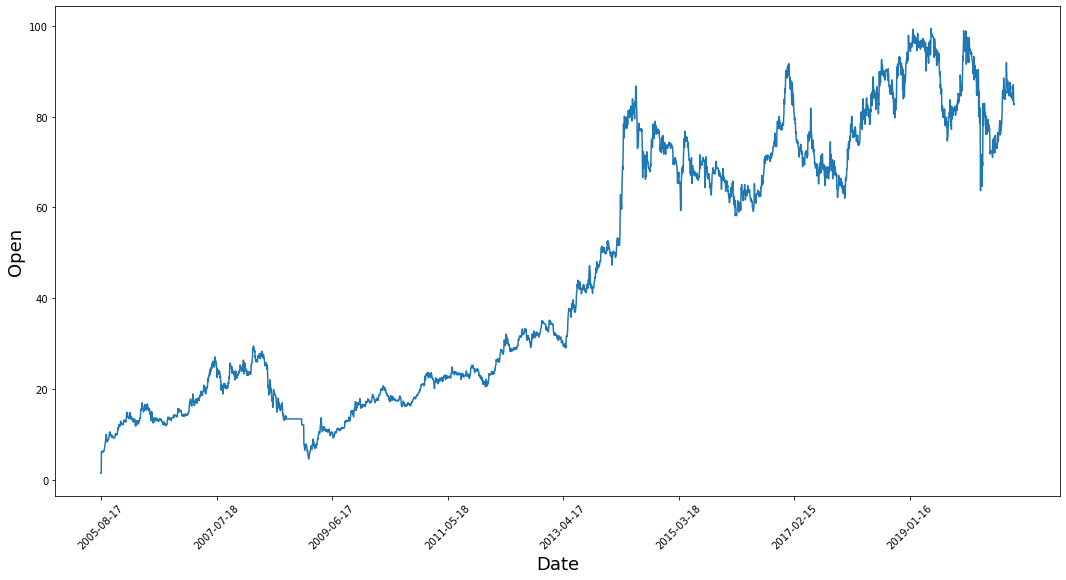

In [8]:
plt.figure(figsize = (18,9))
plt.plot(range(abl.shape[0]), abl['Open'])
plt.xticks(range(0, abl.shape[0], 500), abl['Date'].loc[::500], rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open', fontsize=18)
plt.show()

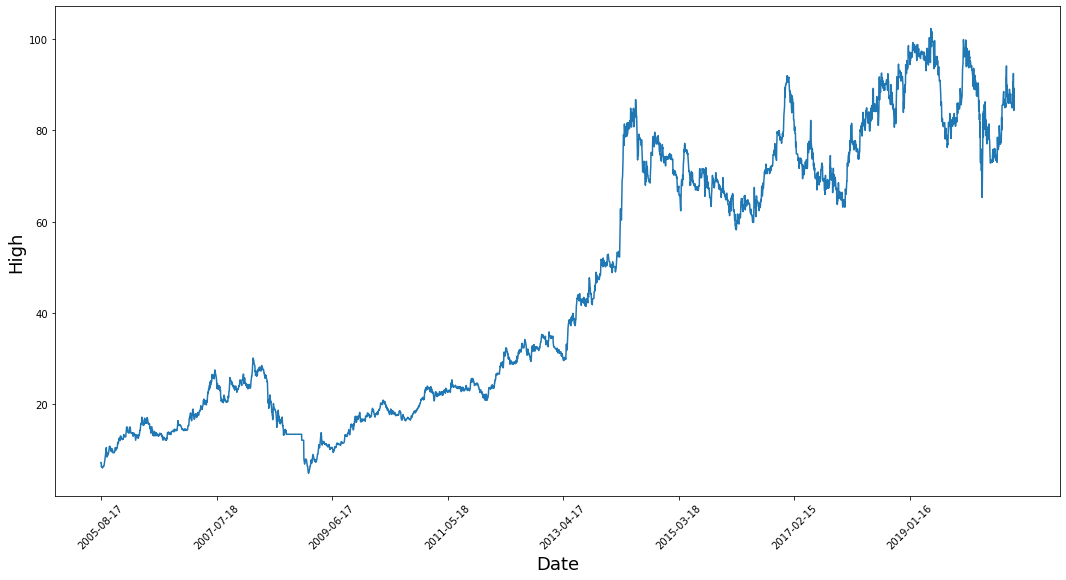

In [9]:
plt.figure(figsize = (18,9))
plt.plot(range(abl.shape[0]), abl['High'])
plt.xticks(range(0, abl.shape[0], 500), abl['Date'].loc[::500], rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('High', fontsize=18)
plt.show()

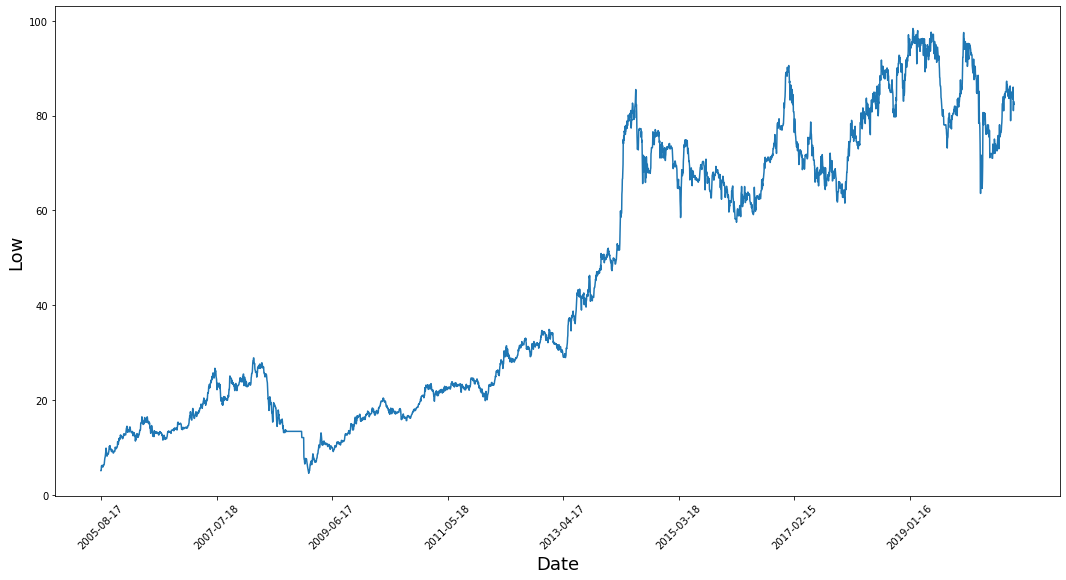

In [10]:
plt.figure(figsize = (18,9))
plt.plot(range(abl.shape[0]), abl['Low'])
plt.xticks(range(0, abl.shape[0], 500), abl['Date'].loc[::500], rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Low', fontsize=18)
plt.show()

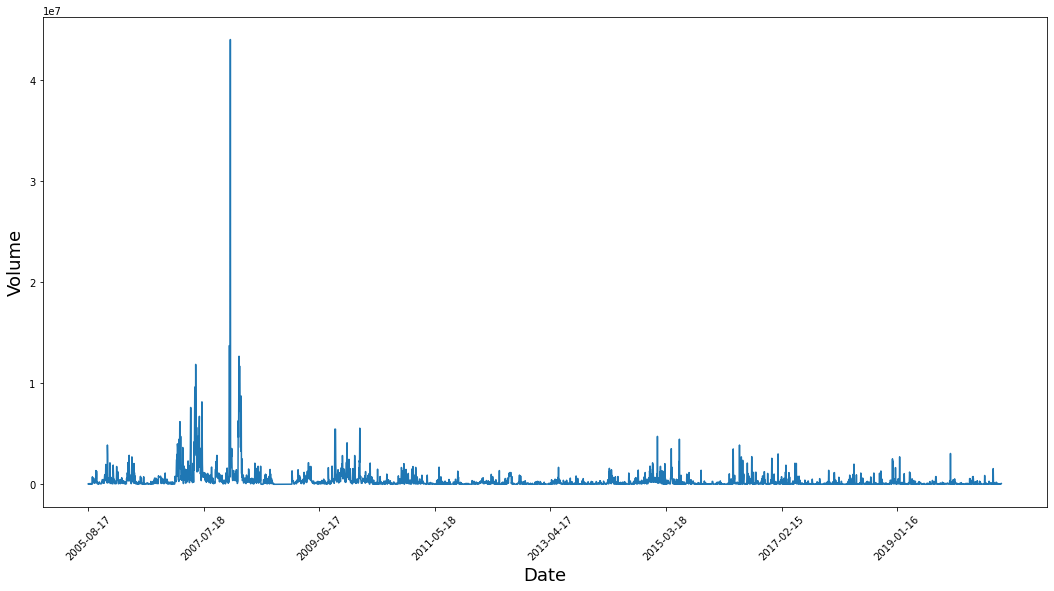

In [11]:
plt.figure(figsize = (18,9))
plt.plot(range(abl.shape[0]), abl['Volume'])
plt.xticks(range(0, abl.shape[0], 500), abl['Date'].loc[::500], rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Volume', fontsize=18)
plt.show()